<a href="https://colab.research.google.com/github/josepeon/python_dad_class/blob/main/neural_network_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to `pytorch`



In [120]:
import torch
import torch.nn as nn
import torch.optim as optim

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Below, a dataset containing information about vehicles is loaded and the `Horsepower` feature is assigned as `X` and `MPG` is assigned as `y`.  This is a regression problem, and we are using the horsepower of a vehicle to predict miles per gallon.

In [122]:
url = 'https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/auto-mpg.csv'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year']

raw_dataset = pd.read_csv(url, names = column_names, skiprows=1)

In [123]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [124]:
X = raw_dataset['Horsepower']
y = raw_dataset['MPG']

In [125]:
clean_df = raw_dataset[['Horsepower', 'MPG']].dropna()

In [126]:
X = clean_df['Horsepower']
y = clean_df['MPG']

In [127]:
print("NaNs in X:", X.isna().sum())
print("NaNs in y:", y.isna().sum())

NaNs in X: 0
NaNs in y: 0


<Axes: xlabel='Horsepower', ylabel='MPG'>

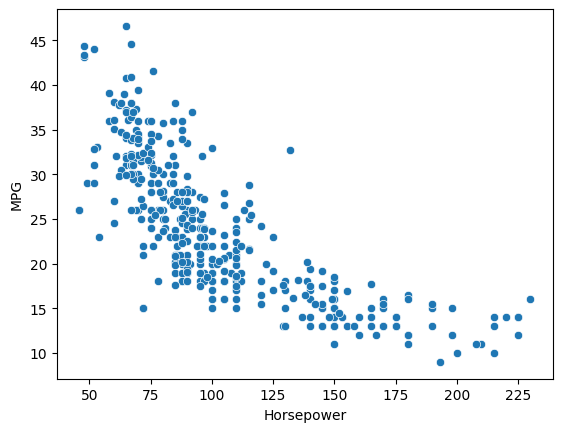

In [128]:
sns.scatterplot(data = raw_dataset, x = 'Horsepower', y = 'MPG')

In [129]:
X

,Horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
...,...
393,86.0
394,52.0
395,84.0
396,79.0


In [130]:
X.shape

(396,)

In [131]:
y.shape

(396,)

#### Problem 1

Make X a `torch.tensor` and y the same.  Be sure to use the correct datatype.

In [132]:
x = torch.tensor(X.values, dtype = torch.float32).unsqueeze(1)

In [133]:
y = torch.tensor(y.values, dtype = torch.float32).unsqueeze(1)

In [134]:
print(x.shape, y.shape)

torch.Size([396, 1]) torch.Size([396, 1])


#### Problem 2

Create a basic model using:

-  `nn.Linear`
- `nn.Sequential`
- `nn.ReLU`

with one hidden layer consisting of 100 neurons.  Assign the model as `reg_model_1` below.

In [135]:
reg_model_1 = nn.Sequential(
    nn.Linear(in_features=1, out_features=100),
    nn.ReLU(),
    nn.Linear(100, 1)
)

#### Problem 3

Use `nn.MSELoss()` to create a variable `loss_fn` below.

In [136]:
loss_fn = nn.MSELoss()

#### Problem 4

Use `optim.SGD` to create a variable `optimizer` below.  Be sure to pass the `reg_model_1.parameters()` as an argument and use `lr = 0.01`.

In [140]:
optimizer = optim.SGD(reg_model_1.parameters(), lr = 0.001)

#### Problem 5

Uncomment the code below to train your model and plot the resulting loss.  Did the model do well?

In [141]:
losses = []
for epoch in range(100):
  yhat = reg_model_1(x)
  loss = loss_fn(y, yhat)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  losses.append(loss.item())
print(losses[0], losses[10], losses[50], losses[-1])

21402.65625 20565.025390625 17530.609375 14418.447265625


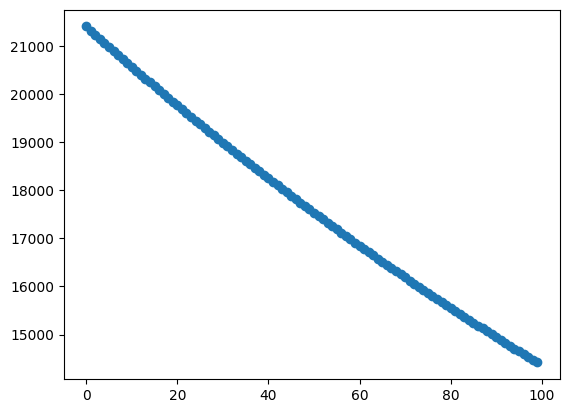

In [142]:
plt.plot(losses, '--o')

#### Problem 6

A more complex model as `model2`.

- 3 layers with 128, 64, and 32 neurons in each layer
- Using all the features

Does this model perform better?  How do you know?

In [149]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [150]:
X = raw_dataset.drop('MPG', axis = 1)
X = torch.tensor(X.values, dtype = torch.float32)

In [151]:
X

tensor([[   8.0000,  307.0000,  130.0000, 3504.0000,   12.0000,   70.0000],
        [   8.0000,  350.0000,  165.0000, 3693.0000,   11.5000,   70.0000],
        [   8.0000,  318.0000,  150.0000, 3436.0000,   11.0000,   70.0000],
        ...,
        [   4.0000,  135.0000,   84.0000, 2295.0000,   11.6000,   82.0000],
        [   4.0000,  120.0000,   79.0000, 2625.0000,   18.6000,   82.0000],
        [   4.0000,  119.0000,   82.0000, 2720.0000,   19.4000,   82.0000]])

In [152]:
#scaling the data
X = (X - X.mean())/X.std()
X.shape

torch.Size([398, 6])

In [153]:
#add your layers here
model2 = nn.Sequential(
    nn.Linear(in_features=X.shape[1], out_features=128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

In [155]:
loss_fn   = nn.MSELoss()
optimizer = optim.SGD(model2.parameters(), lr=0.001)

In [156]:
losses = []
for epoch in range(300):
  yhat = model2(X)
  loss = loss_fn(y.unsqueeze(1), yhat)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([398, 1])) that is different to the input size (torch.Size([396, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


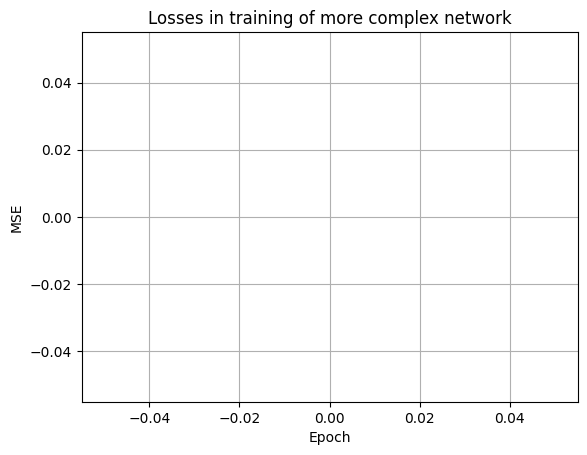

In [157]:
plt.plot(losses, '--o')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Losses in training of more complex network');

#### Image classification

Below we use the [CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.  Consult the documentation to learn more about the data.  To start, the images have to be converted to tensors, and scaled.  This is done using `pytorch` transforms and the `Compose` object to combine `ToTensor` and `Standardize`.

Essentially, this transforms an image into a tensor and scales it.  `Compose` can be used to add a variety of transformations on an image prior to training the model.  We will discuss this more next week however for now it is important to understand that `pytorch` allows you to pass this as an argument when you create a dataset.

In [ ]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor, Normalize, Compose

In [ ]:
transforms = Compose([ToTensor(), Normalize(mean = (0.5, 0.5, 0.5),  std = (0.5, 0.5, 0.5))])

In [ ]:
train_data = CIFAR10(root = '.', download = True, transform=transforms)

In [ ]:
#each object is an image as a tensor and a label
train_data[0]

To simplify things, we convert the dataset to a binary classification problem involving strictly airplanes and cars.  

In [ ]:
#binarization
labels = {0:0, 1:1}
names = ['airplane', 'car']
cifar_binary = [(im, labels[label]) for im, label in train_data if label in [0, 1]]


In [ ]:
cifar_binary[0][0].shape

##### Batches of Data

Because the data is large and the network a bit more complicated, we will train the model on small "batches" of data that are created using the `DataLoader` object in `pytorch`.  This will speed up training and is a typical approach to training a neural network.

In [ ]:
from torch.utils.data import DataLoader, Dataset

In [ ]:
train_loader = DataLoader(cifar_binary, batch_size = 64)

In [ ]:
plt.imshow(cifar_binary[0][0][0], cmap = 'gray')
plt.title('Car');

In [ ]:
plt.imshow(cifar_binary[100][0][0], cmap = 'gray')
plt.title('Plane');

#### `nn.Flatten`

As we have done in class, we flatten the images prior to feeding them into the network.  `pytorch` offers a layer that will do this for us.  In this example, the images are actually color images and have three pixels.  Accordingly we need to flatten across all these images.  We will discuss this in class but for now recognize that the `0,2` represent the start and stop of which dimensions to flatten across.  

In [ ]:
flattener = nn.Flatten( 0, 2)
flattener(cifar_binary[0][0]).shape

In the actual data, the first dimension will represent how much data is in each batch.  Thus, the model below uses `1,3` to flatten each indiviual 3 channel image into one.

In [ ]:
model = nn.Sequential(nn.Flatten(1, 3),
                      nn.Linear(3072, 1000),
                      nn.ReLU(),
                      nn.Linear(1000, 500),
                      nn.ReLU(),
                      nn.Linear(500, 1),
                      nn.Sigmoid())

In [ ]:
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

### Problem 7

Train the model by running the code below.  Add a comment above each line to explain what is happening at each step.  How is the model at predicting cars or planes?

In [ ]:
losses = []
for epoch in range(20):
    for X, y in train_loader:
      yhat = model(X)
      loss = loss_fn(yhat,  y.float().unsqueeze(1))
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    losses.append(loss.item())

In [ ]:
plt.plot(losses, '--o')

### Problem 8

Who is Yann LeCun and what did he do?  Does he use twitter (X)?  What's he up to?  Any important contributions to machine learning and artificial intelligence?

